## Numberisk løsning av varmeliningen i 2 romlige dimensjoner ved bruk av eulers eksplisitte metode

Importerer nødvendige bibliotek

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter 
from IPython.display import HTML

Definerer konstanter.
Her er dt steglengden i tid og er definert slik at eulers eksplisitte metode eksploderer.

In [10]:
alpha = 70
L = 50 # lengde av plate
time = 6 # tid

G_x = 40 # antall gitterpunkter i x
dx = L/G_x # steglengde i x

G_y = G_x # antall gitterpunkter i y
dy = L/G_y # steglengde i y

dt = min(   dx**2 / (4 * alpha),     dy**2 / (4 * alpha)) # steglengde i t
G_t = int(time/dt) # antall gitterpunkter i t


x = np.linspace(0, L, G_x+1) # gitter for x
y = np.linspace(0, L, G_y+1) # gitter for y
t = np.linspace(0, time, G_t+1) # gitter for t


Setter opp matriser for løsningen med initial- og grensebetingelser. Grensebetingelsene er at temperaturen er 0 ved randen av platen. Initialbetingelsen er $1.5 \cdot \sin(\pi \cdot \frac{x}{L} + \pi \cdot \frac{y}{L})$

In [11]:
X, Y = np.meshgrid(x, y) # meshgrid for x og y

u_x_y_0 = lambda x, y : 1.5*np.sin(np.pi*x/L + np.pi*y/L) # initialbetingelse for u(x, y, 0)

u = np.zeros((G_t+1, G_y+1, G_x+1)) # matrise for u(x, y, t)
u[0] = u_x_y_0(X, Y) # initialbetingelse

# boundary conditions
u[0][0, :] = np.zeros(G_x+1)
u[0][G_y, :] = np.zeros(G_x+1)
u[0][:, 0] = np.zeros(G_y+1)
u[0][:, G_x] = np.zeros(G_y+1)


Definerer eulers ekspisitte metode.

In [12]:
def euler_explicit(u):
    print(dt/dx**2, "stabilitetskrav: k/h^2 >= 0.5")
    for j in range(0, G_t):
        for i in range(1, G_x):
            for l in range(1, G_y):
                dd_ux = (u[j][l][i+1] - 2*u[j][l][i] + u[j][l][i-1])/dx**2
                dd_uy = (u[j][l+1][i] - 2*u[j][l][i] + u[j][l-1][i])/dy**2
                u[j+1][l][i] = u[j][l][i] + alpha*dt*(dd_ux + dd_uy)
                
    return u

def euler_implicit(u):
    pass


In [13]:
T = euler_explicit(u)

0.0035714285714285713 stabilitetskrav: k/h^2 >= 0.5


Animerer løsningen.

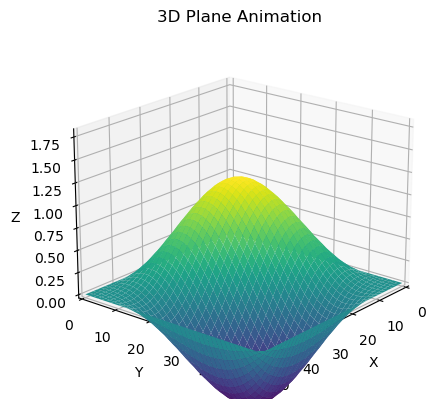

In [21]:
num_frames = 80

# Set up the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


surface = [ax.plot_surface(X, Y, T[0], cmap='viridis')]

# Animation function
def animate(frame):
    # Clear the previous frame
    
    for s in surface:
        s.remove()
    
    # Plot the current frame
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_zlim(0, 1.8)  # Adjust z limits according to your data
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Plane Animation')

    #Rotatin the axis
    ax.view_init(frame/4, frame/2)

    surface[0] = ax.plot_surface(X, Y, T[frame], cmap='viridis')
  

# Create the animation
ani = FuncAnimation(fig, animate, frames=num_frames, interval=70)

# Show the animation

HTML(ani.to_html5_video())

# Save the animation

#ani.save('3d_plane_animation.gif', writer='imagemagick', fps=80)

#saving animation and showing it does not work synchronously in jupyter notebook


Plot av løsningen (dersom animasjon ikke funker).

In [19]:
def plot_plane(p, header):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(header)
    #axis lengths
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_zlim(0, 2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u')
    ax.plot_surface(X, Y, p, cmap='viridis')
    
    ax.view_init(20, 70)

#print(len(T))
#for i in range(3, int(len(T)/2), 40):
#    plot_plane(T[i], f"Tid = {dt*i} sekunder")
#plt.show()

